Решение тестового задания, Молотков В.Э. (molotkov1vl@gmail.com)

In [25]:
from scipy.stats import shapiro, f_oneway, mannwhitneyu, ttest_ind
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')    # Настройка стиля гистограмм

Предварительно данные перемещены из docx файла в csv

In [26]:
data = pd.read_csv('test_data.csv')

Задание констант для проверки гипотез

In [27]:
work_days = 2
age = 35

Проверим данные на пропуски

In [28]:
data.isna().sum()

Количество больничных дней    0
Возраст                       0
Пол                           0
dtype: int64

In [29]:
print(f'Размер данных - {data.shape[0]} строк')

Размер данных - 237 строк


In [30]:
data.head()

,Количество больничных дней,Возраст,Пол
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М


**Проверка гипотезы 1.** 

Требуется проверить, что мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни
значимо чаще женщин.

H0 (нулевая гипотеза) - мужчины пропускают более 2 рабочих дней не чаще женщин.

Н1 - мужчины пропускают более 2 рабочих дней значимо чаще женщин.

Сначала разделим данные на выборки по условию (пол).

In [32]:
data_male = data[data['Пол'] == "М"]['Количество больничных дней']
data_female = data[data['Пол'] == "Ж"]['Количество больничных дней']

Для наглядности построим графики распределения количества дней, пропущенных по болезни

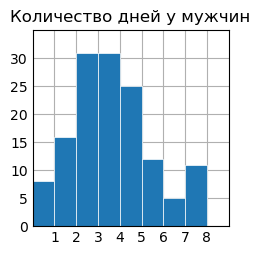

In [33]:
fig, ax = plt.subplots()
ax.hist(data_male, bins=8, linewidth=0.5, edgecolor="white")
ax.set(xlim=(0, 9), xticks=np.arange(1, 9),
       ylim=(0, 35), yticks=np.arange(0, 35, 5))
plt.title('Количество дней у мужчин')
plt.show();

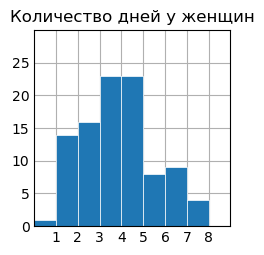

In [34]:
fig, ax = plt.subplots()
ax.hist(data_female, bins=8, linewidth=0.5, edgecolor="white")
ax.set(xlim=(0, 9), xticks=np.arange(1, 9),
       ylim=(0, 30), yticks=np.arange(0, 30, 5))
plt.title('Количество дней у женщин')
plt.show();

Отбираем данные, которые подходят по условию (work_days).

In [35]:
data_male = data_male[data_male > work_days] \
    .reset_index() \
    .drop('index', axis=1)

data_female = data_female[data_female > work_days] \
    .reset_index() \
    .drop('index', axis=1)

Рассмотрим полученные данные.

In [36]:
pd.concat([
    data_male.rename({'Количество больничных дней': 'Количество больничных дней у мужчин'}, axis=1).describe(), 
    data_female.rename({'Количество больничных дней': 'Количество больничных дней у женщин'}, axis=1).describe()
], axis=1)

,Количество больничных дней у мужчин,Количество больничных дней у женщин
count,84.000000,67.000000
mean,4.333333,4.238806
std,1.475367,1.268375
min,3.000000,3.000000
25%,3.000000,3.000000
50%,4.000000,4.000000
75%,5.000000,5.000000
max,8.000000,8.000000


Проверим нулевую гипотезу с помощью дисперсионного анализа (ANOVA), t-теста, U-критерия Манна — Уитни

In [37]:
stat, anova_p = f_oneway(data_male, data_female)
print(f'ANOVA p-value = {anova_p[0]}')

min_data_shape = min(data_female.shape[0], data_male.shape[0])

stat, p = ttest_ind(data_male[:min_data_shape], data_female[:min_data_shape])
print(f't-test p-value = {p[0]}')

stat, p = mannwhitneyu(data_male[:min_data_shape], data_female[:min_data_shape])
print(f'Mann-Whitney  p-value = {p[0]}')

ANOVA p-value = 0.6780633210328133
t-test p-value = 0.5789617367658996
Mann-Whitney  p-value = 0.8654161396657263


Полученные значения > 0.05 - отвергаем нулевую гипотезу.

Следовательно, имеет место значимая разница между значениями длительности болезни у женщин и мужчин.


In [38]:
if data_male['Количество больничных дней'].mean() > data_female['Количество больничных дней'].mean():
    print(f'Гипотеза 1 подтверждена. Мужчины пропускают по болезни более {work_days} дней в течение года значимо чаще женщин.')
else:
    print('Женщины пропускают по болезни чаще мужчин. Гипотеза 1 отклонена')

Гипотеза 1 подтверждена. Мужчины пропускают по болезни более 2 дней в течение года значимо чаще женщин.


**Проверка гипотезы 2**

Требуется проверить, что работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней
(work_days) по болезни значимо чаще своих более молодых коллег.

H0 (нулевая гипотеза) - работники старше 35 лет пропускают более 2 рабочих дней не чаще более молодых коллег.

Н1 - работники старше 35 лет пропускают более 2 рабочих дней значимо чаще более молодых коллег.

Сначала разделим данные на выборки по условию (пол).

In [39]:
data_old = data[data['Возраст'] > age]['Количество больничных дней']
data_young = data[data['Возраст'] <= age]['Количество больничных дней']

Для наглядности построим графики распределения количества дней, пропущенных по болезни.

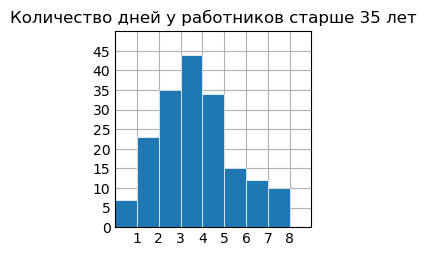

In [40]:
fig, ax = plt.subplots()
ax.hist(data_old, bins=8, linewidth=0.5, edgecolor="white")
ax.set(xlim=(0, 9), xticks=np.arange(1, 9),
       ylim=(0, 50), yticks=np.arange(0, 50, 5))
plt.title('Количество дней у работников старше 35 лет')
plt.show();

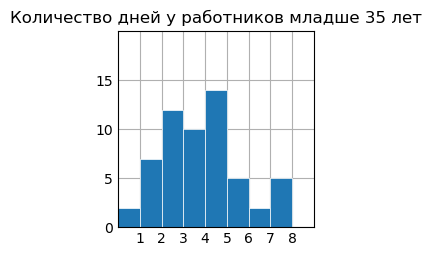

In [41]:
fig, ax = plt.subplots()
ax.hist(data_young, bins=8, linewidth=0.5, edgecolor="white")
ax.set(xlim=(0, 9), xticks=np.arange(1, 9),
       ylim=(0, 20), yticks=np.arange(0, 20, 5))
plt.title('Количество дней у работников младше 35 лет')
plt.show();

Отбираем данные, которые подходят по условию (work_days).

In [42]:
data_old = pd.DataFrame(data_old[data_old > work_days]) \
    .reset_index() \
    .drop('index', axis=1)

data_young = pd.DataFrame(data_young[data_young > work_days]) \
    .reset_index() \
    .drop('index', axis=1)

Рассмотрим полученные данные.

In [43]:
pd.concat([data_old.rename({'Количество больничных дней': 'Больничные дни у работников старше 35 лет'}, axis=1).describe(), 
           data_young.rename({'Количество больничных дней': 'Больничные дни у работников младше 35 лет'}, axis=1).describe()], axis=1)

,Больничные дни у работников старше 35 лет,Больничные дни у работников младше 35 лет
count,115.000000,36.000000
mean,4.243478,4.444444
std,1.361058,1.462765
min,3.000000,3.000000
25%,3.000000,3.000000
50%,4.000000,4.000000
75%,5.000000,5.000000
max,8.000000,8.000000


Проверим нулевую гипотезу с помощью дисперсионного анализа (ANOVA), t-теста, U-критерия Манна — Уитни.

In [44]:
stat, anova_p = f_oneway(data_old, data_young)
print(f'ANOVA p-value = {anova_p[0]}')

min_data_shape = min(data_old.shape[0], data_young.shape[0])

stat, p = ttest_ind(data_old[:min_data_shape], data_young[:min_data_shape])
print(f't-test p-value = {p[0]}')

stat, p = mannwhitneyu(data_old[:min_data_shape], data_young[:min_data_shape])
print(f'Mann-Whitney  p-value = {p[0]}')

ANOVA p-value = 0.44879229579719326
t-test p-value = 0.1846422372509844
Mann-Whitney  p-value = 0.2313967862877805


Полученные значения > 0.05 - отвергаем нулевую гипотезу.

Следовательно, имеет место значимая разница между значениями длительности болезни у работников старше и младше 35 лет.


In [45]:
if data_old['Количество больничных дней'].mean() > data_young['Количество больничных дней'].mean():
    print('Гипотеза 2 подтверждена.')
else:
    print(f'Гипотеза 2 отклонена. Работники младше {age} лет пропускают чаще.')

Гипотеза 2 отклонена. Работники младше 35 лет пропускают чаще.
